
 ## Feature Selection-Information gain - mutual information In Classification Problem Statements
 
Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.**

In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [9]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [12]:
X = df.drop(labels = 'Wine',axis =1)
Y = df['Wine']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

**Computing the Mutual Information for the features**

In [16]:
from sklearn.feature_selection import mutual_info_classif

In [17]:
mut_inf = mutual_info_classif(x_train,y_train)
mut_inf

array([0.44533482, 0.25268728, 0.05226198, 0.17786649, 0.2449006 ,
       0.4407651 , 0.66549121, 0.09945397, 0.30788462, 0.56297734,
       0.50712333, 0.46287311, 0.53384482])

In [29]:
mut_inf = pd.Series(mut_inf)
mut_inf.index = x_train.columns
mut_inf.sort_values(ascending = False)


Flavanoids              0.665491
Color.int               0.562977
Proline                 0.533845
Hue                     0.507123
OD                      0.462873
Alcohol                 0.445335
Phenols                 0.440765
Proanth                 0.307885
Malic.acid              0.252687
Mg                      0.244901
Acl                     0.177866
Nonflavanoid.phenols    0.099454
Ash                     0.052262
dtype: float64

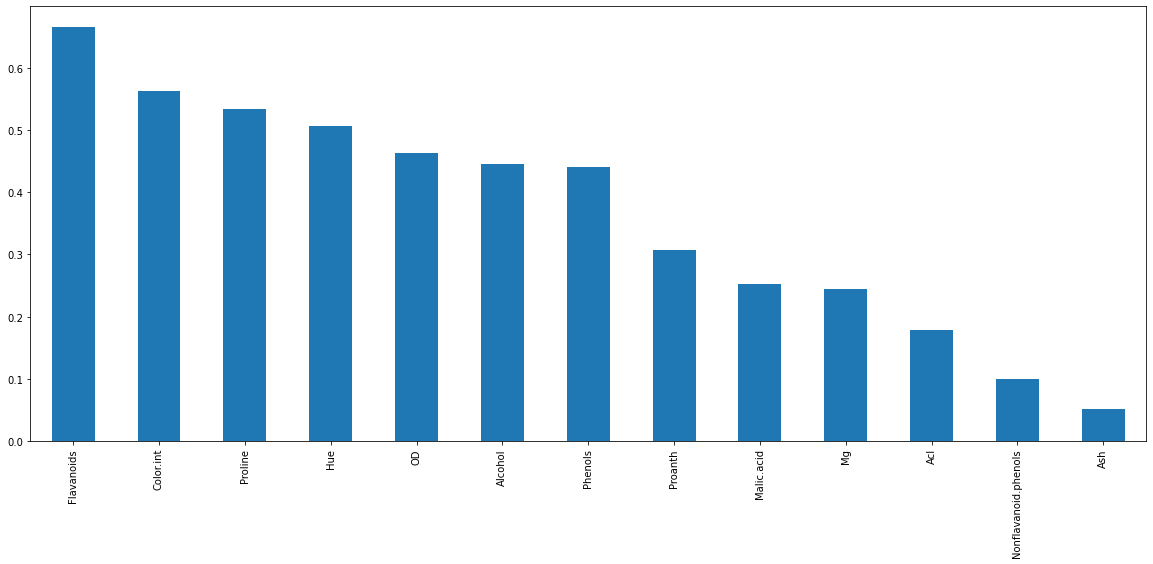

In [33]:
mut_inf.sort_values(ascending = False).plot.bar(figsize=(20,8))

In [34]:
from sklearn.feature_selection import SelectKBest

In [35]:
sel_ft  = SelectKBest(mutual_info_classif,k=10)
sel_ft.fit(x_train,y_train)

SelectKBest(score_func=<function mutual_info_classif at 0x00000021EE92B550>)

**Features with high mutual information are selected (10 features)**

In [41]:
x_train.columns[sel_ft.get_support()]

Index(['Alcohol', 'Malic.acid', 'Mg', 'Phenols', 'Flavanoids', 'Proanth',
       'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')

# Feature Selection-Information gain - mutual information In Regression Problem Statements


**Mutual Information**
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

**I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.**

In [42]:
import pandas as pd

In [43]:
df = pd.read_csv("house_prices.csv")

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [55]:
data_type =["float64","int64"]
num_ft = []
for i in df.columns:
    if df[i].dtypes in data_type:
        num_ft.append(i)

In [56]:
num_ft

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [57]:
df = df[num_ft]

In [58]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [60]:
X = df.drop(labels = "SalePrice",axis=1)
Y= df['SalePrice']

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(X.fillna(0),Y,test_size=0.3)

In [79]:
from sklearn.feature_selection import mutual_info_regression
mut_info = mutual_info_regression(x_train.fillna(0),y_train)
mut_info

array([0.00000000e+00, 2.96608156e-01, 2.11697333e-01, 1.22232040e-01,
       5.85916085e-01, 8.72676248e-02, 3.90239539e-01, 2.83809245e-01,
       7.77847574e-02, 1.61314670e-01, 1.17707189e-02, 8.58372766e-02,
       3.85439273e-01, 3.02186871e-01, 2.15933962e-01, 5.73563769e-03,
       4.60721418e-01, 4.22132074e-02, 5.67069660e-04, 2.50787993e-01,
       8.47047287e-02, 6.44459589e-02, 3.21804824e-02, 1.90105002e-01,
       1.63099379e-01, 2.54821921e-01, 3.65174464e-01, 3.68567478e-01,
       1.30416233e-01, 1.59755280e-01, 3.23325588e-02, 7.67630171e-03,
       1.36742710e-02, 3.00901076e-03, 9.00976189e-03, 1.95820408e-02,
       7.10571117e-04])

In [81]:
mut_info = pd.Series(mut_info)
mut_info.index = x_train.columns
mut_info.sort_values(ascending = False)

OverallQual      0.585916
GrLivArea        0.460721
YearBuilt        0.390240
TotalBsmtSF      0.385439
GarageArea       0.368567
GarageCars       0.365174
1stFlrSF         0.302187
MSSubClass       0.296608
YearRemodAdd     0.283809
GarageYrBlt      0.254822
FullBath         0.250788
2ndFlrSF         0.215934
LotFrontage      0.211697
TotRmsAbvGrd     0.190105
Fireplaces       0.163099
BsmtFinSF1       0.161315
OpenPorchSF      0.159755
WoodDeckSF       0.130416
LotArea          0.122232
OverallCond      0.087268
BsmtUnfSF        0.085837
HalfBath         0.084705
MasVnrArea       0.077785
BedroomAbvGr     0.064446
BsmtFullBath     0.042213
EnclosedPorch    0.032333
KitchenAbvGr     0.032180
MoSold           0.019582
ScreenPorch      0.013674
BsmtFinSF2       0.011771
MiscVal          0.009010
3SsnPorch        0.007676
LowQualFinSF     0.005736
PoolArea         0.003009
YrSold           0.000711
BsmtHalfBath     0.000567
Id               0.000000
dtype: float64

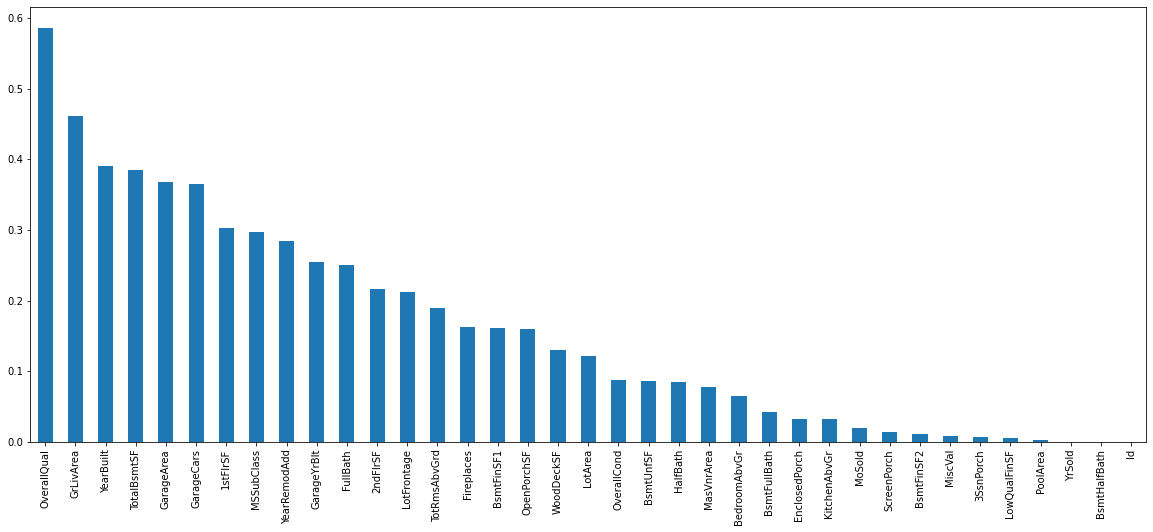

In [83]:
mut_info.sort_values(ascending = False).plot.bar(figsize=(20,8))

In [85]:
from sklearn.feature_selection import SelectPercentile
sel_per = SelectPercentile(mutual_info_regression,percentile=20)
sel_per.fit(x_train,y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x00000021EE92B430>)

In [87]:
sel_per.get_support()

array([False, False, False, False,  True, False,  True,  True, False,
       False, False, False,  True,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False])

In [88]:
x_train.columns[sel_per.get_support()]

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'GarageCars', 'GarageArea'],
      dtype='object')